# エッジの検出

## 画像の微分
- 微分とは小さな区間の関数の変化
    - 曲線の傾き = X (微分係数)の求め方
$$
X = \frac{f(x+dx)-f(x)}{dx}
$$

- x 〜 x+dx における y の変化量 f(x+dx)

傾き = $\frac{y}{x}$ (yの変化量/xの変化量)



#### <u>画像を微分するとエッジが検出できる</u>
- 画像の微分も上記の式と同じように考える事ができる
    - **画像処理での微分**
        - 黒　=　画素値(0)
        - 白　=　画素値(255)
        - *傾き　＝　隣の画素値(255　or　0)　-　自分の画素値(0　or　255)*
        - 傾き　= 255　or　-255 ※ *エッジがあった場合だけ傾きが出る*


- 画素値の場合は隣との距離 px は全て同じ距離 **(定数)** になる
    - <u>*微分すると傾きの部分だけがエッジが残る*</u>

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
img = cv2.imread("data/src/Lena.jpg", 0) # 0 をつける事でグレースケールにできる
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

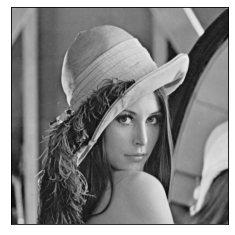

In [12]:
# plt.figure(figsize=(12, 8))
plt.imshow(img, cmap=plt.cm.gray) # BGR -> RGB
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.show()

## Sobel filter (ソーベルフィルター)

In [13]:
# 微分する方向を選べる : 入力画像 : bit深度 : X方向 1,0/y 0,1 : kenel size :
img_sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)

In [14]:
img_sobelx

array([[   0.,   -4.,   -6., ...,  -72., -174.,    0.],
       [   0.,   -1.,   -5., ...,  -68., -176.,    0.],
       [   0.,    3.,   -5., ...,  -58., -169.,    0.],
       ...,
       [   0.,   31.,   14., ...,   -1.,  -12.,    0.],
       [   0.,   51.,   26., ...,    6.,    9.,    0.],
       [   0.,   58.,   28., ...,   10.,   20.,    0.]], dtype=float32)

- <u>画像を微分した値</u>
    - 正の値も負の値も両方入っている

- <u>*0 ~ 255　段階に直す*</u>
    - convertScalAbs() : 関数使用

In [15]:
img_sobelx = cv2.convertScaleAbs(img_sobelx)
img_sobelx

array([[  0,   4,   6, ...,  72, 174,   0],
       [  0,   1,   5, ...,  68, 176,   0],
       [  0,   3,   5, ...,  58, 169,   0],
       ...,
       [  0,  31,  14, ...,   1,  12,   0],
       [  0,  51,  26, ...,   6,   9,   0],
       [  0,  58,  28, ...,  10,  20,   0]], dtype=uint8)

In [16]:
img_sobely = cv2.convertScaleAbs(img_sobely)
img_sobely

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  1,  5, ...,  2,  0,  2],
       [ 2,  3,  3, ...,  6,  9, 18],
       ...,
       [24, 11, 12, ..., 11, 24, 34],
       [ 2,  9, 18, ...,  4, 19, 30],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [17]:
cv2.imshow("x", img_sobelx)
cv2.imshow("y", img_sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

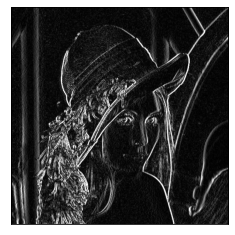

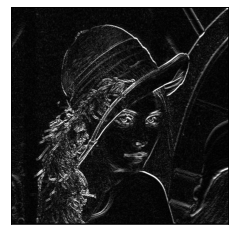

In [19]:
images = [img_sobelx, img_sobely]
for imgs in images:
#     plt.figure(figsize=(12, 8))
    plt.imshow(imgs, cmap=plt.cm.gray)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.show()

- <u>上の画像</u>
    - sobelx　:　x方向に微分した画像
    - 横方向に微分を行うので、それに対して **垂直な方向にエッジ** が検出しやすい
    
    
- <u>下の画像</u>
    - sobely　:　y方向に微分した画像
    - 縦方向に微分を行うので、それに対して **水平方向にエッジ** が検出しやすい

## Laplacian filter (ラプラシアンフィルター)

In [20]:
# laplacian の場合は方向がないので/ 入力画像 : bit深度
img_lap = cv2.Laplacian(img, cv2.CV_32F)

In [21]:
# 0 ~ 255段階に直す / 絶対値に変換する : 0~256 段階に変換
img_lap = cv2.convertScaleAbs(img_lap)

In [22]:
cv2.imshow("lap", img_lap)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

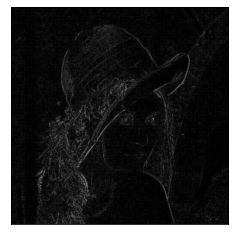

In [23]:
# plt.figure(figsize=(12, 8))
plt.imshow(img_lap, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

### laplacian image
- Laplacian は方向がないので全てのエッジが均一に検出されている
    - *全てのエッジが検出されている*
    - 2次の微分なので少し値そのものが弱い
    - その場合は img_lap *= 2 を２倍にする。しかし一緒にノイズも載ってしまう
    - **Gaussianそこで Laplacian Gaussian の出番**

([], [])

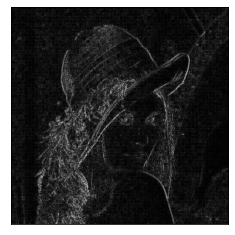

In [24]:
# 値を２倍する
img_lap *= 2

# plt.figure(figsize=(12, 8))
plt.imshow(img_lap, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

## Laplasian Gaussian filter (ラプラシアン　ガウシャン)
- <u>Laplasian Gaussian の方がしっかりとエッジを検出できる</u>


1. Gaussian filter かけて
2. Laplasian filter かけて
3. 0 ~ 255 段階に直す。絶対値に変換する : 0~256 段階に変換
4. エッジをクッキリさせたい場合は　２倍させる
5. 表示　code

In [25]:
img_blur = cv2.GaussianBlur(img, (3, 3), 2)
img_lap2 = cv2.Laplacian(img_blur, cv2.CV_32F)
img_lap2 = cv2.convertScaleAbs(img_lap2)
img_lap2 *= 2
cv2.imshow('lap2', img_lap2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

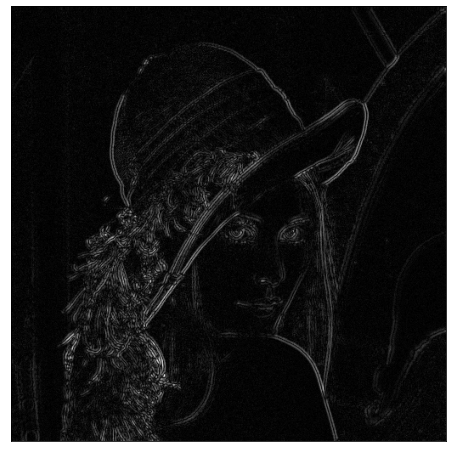

In [26]:
plt.figure(figsize=(12, 8))
plt.imshow(img_lap2, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

- <u>ノイズがBlur処理によって消えている</u>


#### Laplasian Gaussian の方がしっかりとエッジを検出できる

# Canny (キャニー)
- <u>Canny はノイスをうまく取り除き、エッジを検出する</u>
- 線画に近い形になる　=　**2値画像になる**


### Canny のアルゴリズムは４段階
1. <u>Gaussianfilterでぼかす</u>
   - ぼかすことでノイズを取り除く


2. <u>Sobelfilterで微分する</u>
   - x,y 方向のエッジを検出
       - x方向の微分
       - y方向の微分
   
   
3. <u>極大点を探す</u>
   - エッジを探す為 -> 極大点(白・黒・白・黒・白：山形の形)を探す
       - **ノイズは極大値にはならない**
   - ２乗はとってスクエアルートになおす
   - グラデーション部分が残ってくる
   
   
4. <u>2段階の閾値処理でエッジを残す</u>>
   - ノイズは消す。細かいエッジは残す
   - ２段階でエッジ検出
       - **閾値２つを設定する事によって細かいエッジも見逃さない**

In [27]:
 # Canny 関数 : 画像 : 閾値、小、大(２段階設定)
img_canny = cv2.Canny(img, 10, 100)
cv2.imshow("Canny", img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

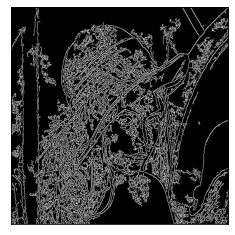

In [28]:
# plt.figure(figsize=(12, 8))
plt.imshow(img_canny, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

- <u>閾値の設定がまだ甘い</u>
    - 下を　１０　に設定しているので、まだノイズが混じっている
        - 画像を見ながら調整

In [29]:
 # Canny 関数 : 画像 : 閾値、小、大(２段階設定)
img_canny = cv2.Canny(img, 100, 200)
cv2.imshow("Canny", img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

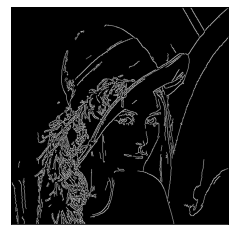

In [30]:
# plt.figure(figsize=(12, 8))
plt.imshow(img_canny, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

#### <u>２つの閾値を調整することでエッジの検出が格段に良くなる</u>